# This is the code for visualizing the effect of different rounds of debates to the 4 creativity scores

In [38]:
import os
import json
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [39]:
directory_path = '../../../eval_api/result/'
json_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.json')]

file_pairs = []
for filename in json_files:
    parts = filename.split('_')
    num = int(parts[6]) 
    file_pairs.append((num, filename))

sorted_file_pairs = sorted(file_pairs, key=lambda x: x[0])
sorted_file_paths = [os.path.join(directory_path, pair[1]) for pair in sorted_file_pairs]

print(sorted_file_paths)

['../../../eval_api/result/evaluation_discussion_final_results_02-21_2_2_sampling_3_sample.json', '../../../eval_api/result/evaluation_discussion_final_results_02-21_2_4_sampling_3_sample.json', '../../../eval_api/result/evaluation_discussion_final_results_02-21_2_6_sampling_3_sample.json', '../../../eval_api/result/evaluation_discussion_final_results_02-21_2_8_sampling_3_sample.json', '../../../eval_api/result/evaluation_discussion_final_results_02-21_2_10_sampling_3_sample.json']


In [53]:
mock_data_template = {
    "originality": [{"average_originality": np.random.uniform(2, 5)}],
    "elaboration": [{"average_elaboration": np.random.uniform(3, 5)}],
    "flexibility": [{"average_flexibility": np.random.uniform(7, 10)}],
    "fluency": [{"average_fluency": np.random.uniform(9, 10)}]
}

originality_scores = []
elaboration_scores = []
flexibility_scores = []
fluency_scores = []
file_labels = []

for file_path in sorted_file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Calculate the sum of the last scores for each item
    originality = sum(item['originality'][-1]['average_originality'] for item in data)
    elaboration = sum(item['elaboration'][-1]['average_elaboration'] for item in data)
    flexibility = sum(item['flexibility'][-1]['average_flexibility'] for item in data)
    fluency = sum(item['fluency'][-1]['average_fluency'] for item in data)

    # Calculate the average scores
    avg_originality = originality / len(data)
    avg_elaboration = elaboration / len(data)
    avg_flexibility = flexibility / len(data)
    avg_fluency = fluency / len(data)

    # Append the average scores to the lists
    originality_scores.append(avg_originality)
    elaboration_scores.append(avg_elaboration)
    flexibility_scores.append(avg_flexibility)
    fluency_scores.append(avg_fluency)

    # Get the label from the filename without the extension
    parts = file_path.split('/')
    filename = parts[5]
    print(filename)
    file_labels.append(filename)

../../../eval_api/result/evaluation_discussion_final_results_02-21_2_2_sampling_3_sample.json
evaluation_discussion_final_results_02-21_2_2_sampling_3_sample.json
../../../eval_api/result/evaluation_discussion_final_results_02-21_2_4_sampling_3_sample.json
evaluation_discussion_final_results_02-21_2_4_sampling_3_sample.json
../../../eval_api/result/evaluation_discussion_final_results_02-21_2_6_sampling_3_sample.json
evaluation_discussion_final_results_02-21_2_6_sampling_3_sample.json
../../../eval_api/result/evaluation_discussion_final_results_02-21_2_8_sampling_3_sample.json
evaluation_discussion_final_results_02-21_2_8_sampling_3_sample.json
../../../eval_api/result/evaluation_discussion_final_results_02-21_2_10_sampling_3_sample.json
evaluation_discussion_final_results_02-21_2_10_sampling_3_sample.json


In [54]:
extracted_labels = []
for label in file_labels:
    parts = label.split('_')
    extracted_labels.append(int(parts[6]))

extracted_labels = [str(label) for label in extracted_labels]
print(extracted_labels)

['2', '4', '6', '8', '10']


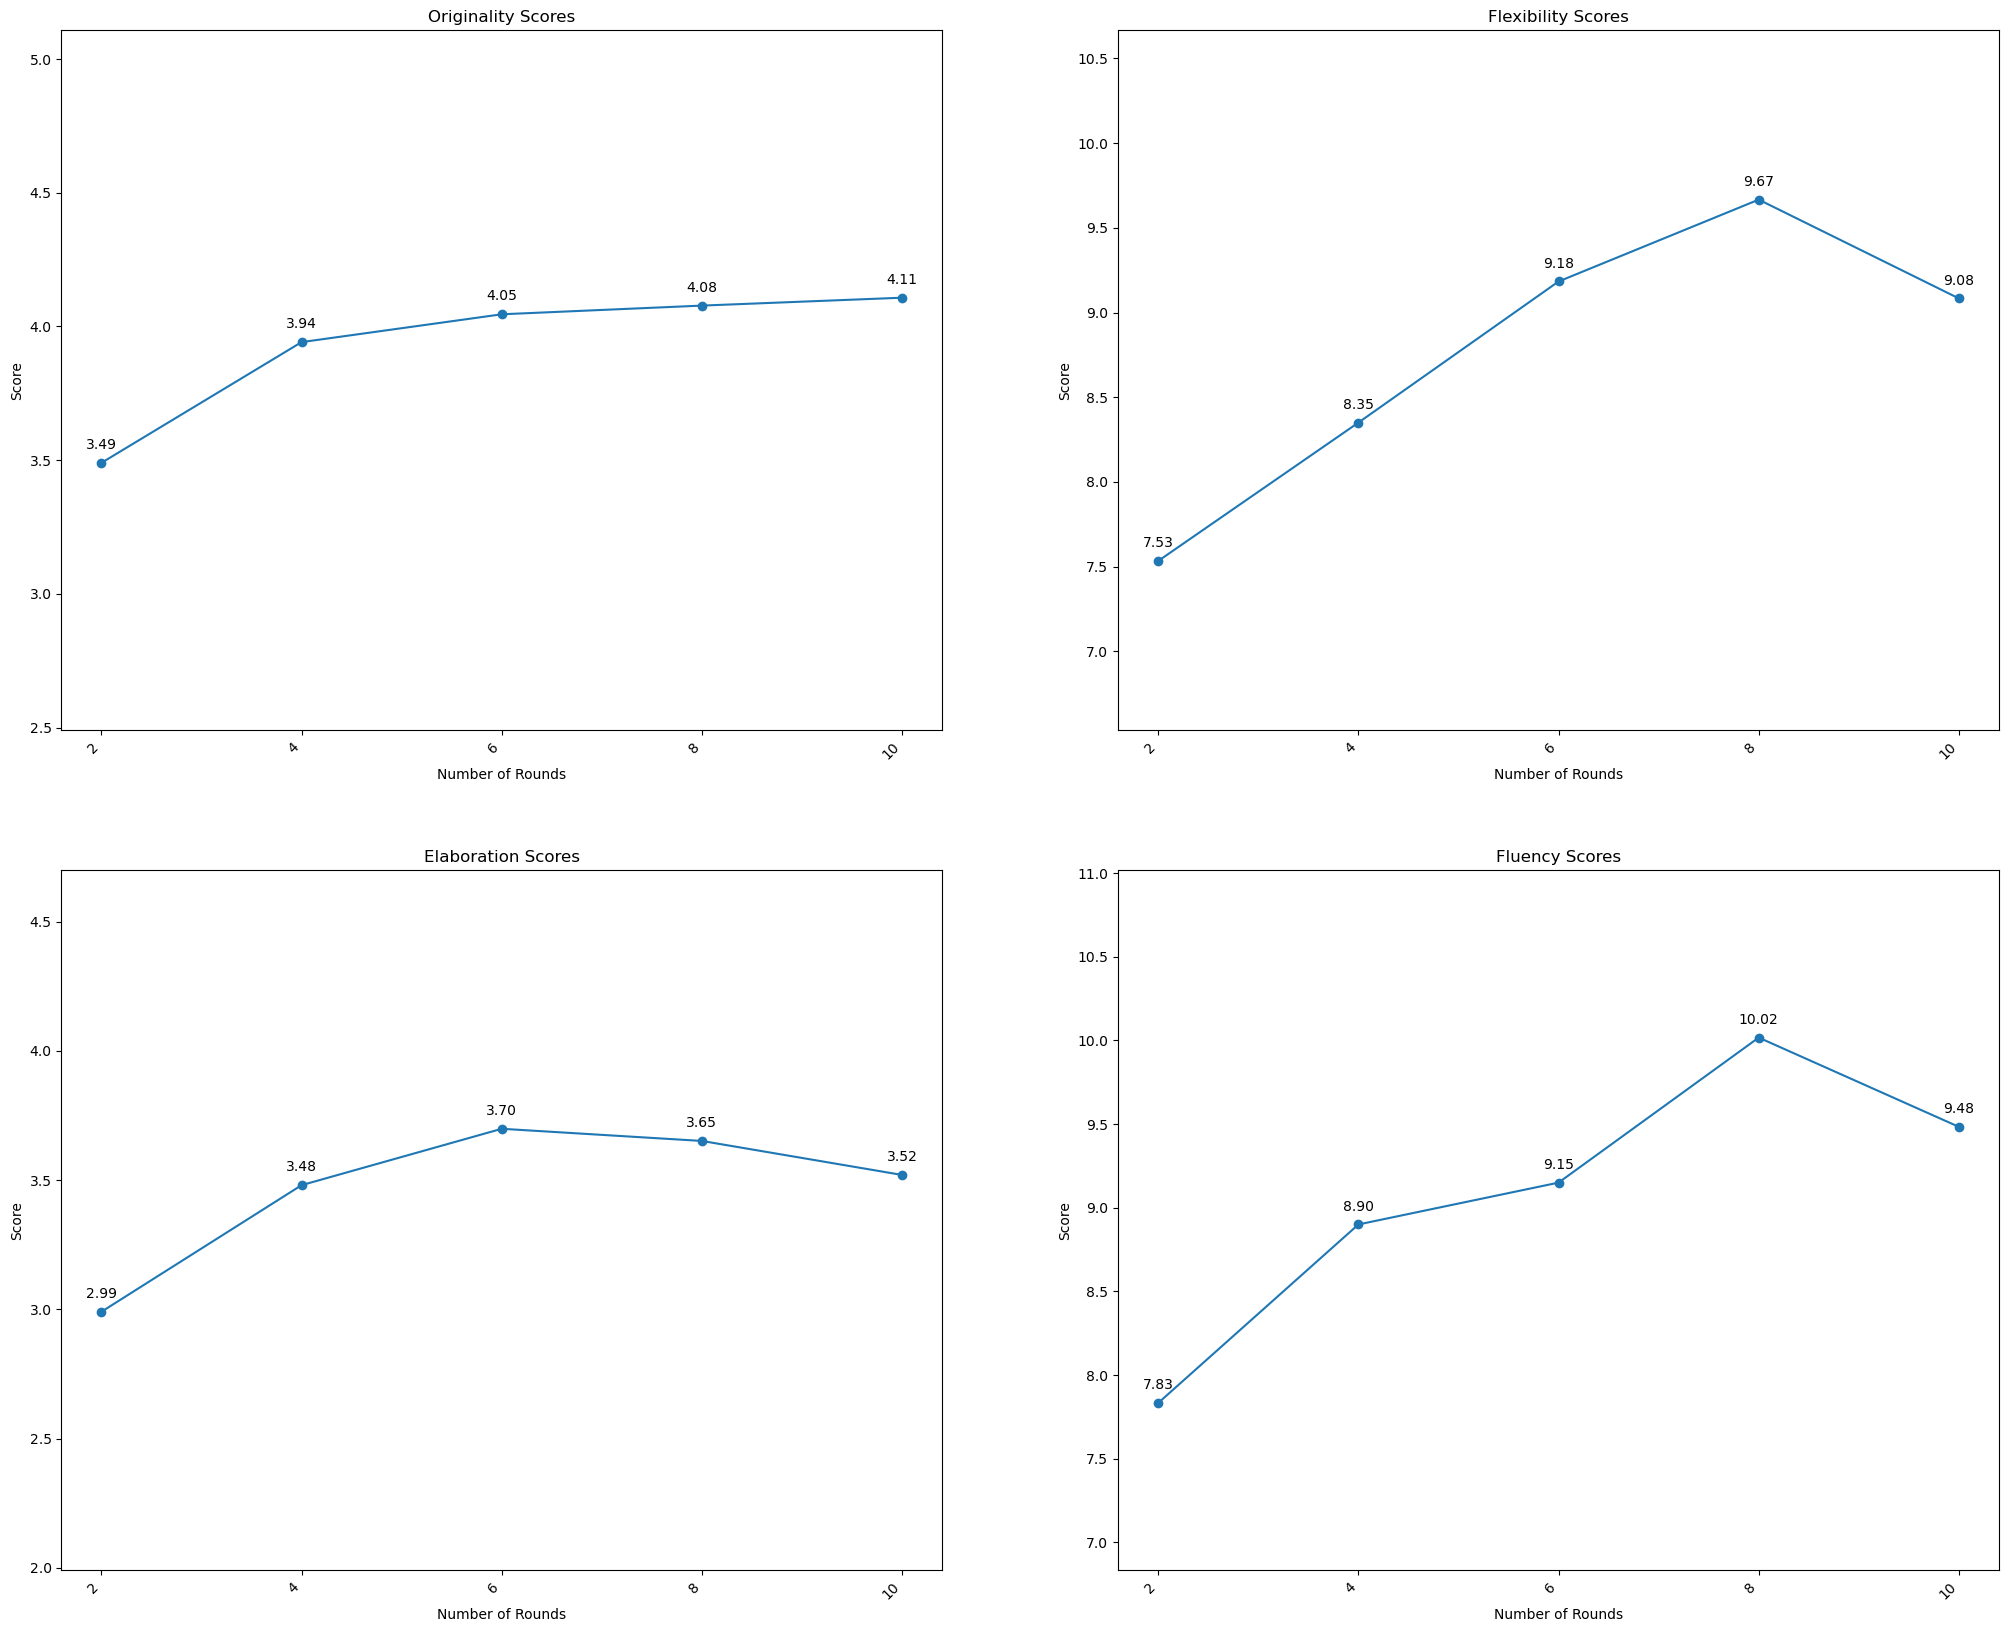

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(25, 20))  # 2x2 grid of subplots

# Defining a simple function to format the subplot for consistency
def format_subplot(ax, title, scores, labels):
    ax.plot(labels, scores, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Rounds')
    ax.set_ylabel('Score') 

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylim([min(scores) - 1, max(scores) + 1])

    for i, score in enumerate(scores):
        ax.annotate(f'{score:.2f}',
                    (labels[i], scores[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')  

# Plot each category
format_subplot(axs[0, 0], 'Originality Scores', originality_scores, extracted_labels)
format_subplot(axs[0, 1], 'Flexibility Scores', flexibility_scores, extracted_labels)
format_subplot(axs[1, 0], 'Elaboration Scores', elaboration_scores, extracted_labels)
format_subplot(axs[1, 1], 'Fluency Scores', fluency_scores, extracted_labels)


In [56]:
folder_path = '../../results/figures/'
base_file_name = 'subplot'
file_extension = '.png'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

counter = 0
file_name = f"{base_file_name}-{counter}{file_extension}"
full_file_path = os.path.join(folder_path, file_name)

while os.path.exists(full_file_path):
    counter += 1
    file_name = f"{base_file_name}-{counter}{file_extension}"
    full_file_path = os.path.join(folder_path, file_name)

fig.savefig(full_file_path)
print(f'Figure saved to {full_file_path}')


Figure saved to ../../results/figures/subplot-1.png
